<h1>K-means clustering</h1>

O K-means clustering é um algoritmo de aprendizado não supervisionado usado para agrupar dados em K grupos (clusters) com base em similaridade. Ele é um dos métodos de clustering mais populares e eficientes para grandes conjuntos de dados.

<h3>🎯 O que é e qual o objetivo?</h3>
O K-means tenta particionar n observações em k grupos onde cada ponto pertence ao cluster com o centroide mais próximo (média dos pontos do grupo).

<h4>Processo:</h4>
<ul>
    <li>Inicializa k centróides (aleatórios ou com k-means++).</li>
    <li>Atribui cada ponto ao centróide mais próximo.</li>
    <li>Recalcula os centróides como a média dos pontos atribuídos a cada cluster.</li>
    <li>Repete até os centróides convergirem (ou atingir número máximo de iterações).</li>
</ul>

<h3>✅ Pré-requisitos</h3>
<ul>
    <li>Escolher o número de clusters (k) antecipadamente.</li>
    <li>Dados numéricos ou vetorizados.</li>
    <li>Idealmente, clusters com forma aproximadamente esférica e de tamanho similar.</li>
</ul>

<h3>✅ Vantagens</h3>
<ul>
    <li>Simples e rápido, mesmo em grandes volumes de dados</li>
    <li>Fácil de implementar e interpretar</li>
    <li>Funciona bem com dados bem separados.</li>
</ul>

<h3>❌ Desvantagens</h3>
<ul>
    <li>Necessidade de definir k (número de clusters).</li>
    <li>Sensível a outliers e valores iniciais aleatórios.</li>
    <li>Assume clusters esféricos e balanceados.</li>
    <li>Pode convergir para mínimo local.</li>
</ul>

<h3>💼 Aplicações comuns</h3>
<ul>
    <li>📈 Análise de dados
        <ul>
            <li>Segmentação de clientes por comportamento ou perfil.</li>
            <li>Agrupamento de produtos com base em atributos.</li>
        </ul>
    </li>
    <li>🧠 Pré-processamento
        <ul>
            <li>Compressão de dados ou redução de ruído.</li>
            <li>Agrupamento de features ou amostras para modelos supervisionados.</li>
        </ul>
   </li>
    <li>🌐 Visão computacional
        <ul>
            <li>Segmentação de imagem (ex: separar regiões com cores similares).</li>
            <li>Compressão de imagem via agrupamento de cores (quantização)</li>
        </ul>
   </li>
</ul>

















<h2>Iniciando o ambiente</h2>

In [13]:
import numpy as np
import pandas as pd
#from pandas import Series, DataFrame

import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets


<h2>Carregando dataset iris</h2>

In [83]:
iris = pd.read_csv('iris.data.csv', header=None)
iris.columns = ['Sepal Lenght', 'Sepal Width', 'Petal Lenght', 'Petal Widtn','Targets']
iris.head()

,Sepal Lenght,Sepal Width,Petal Lenght,Petal Widtn,Targets
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [178]:

y = pd.DataFrame(iris.Targets)
iris_data = iris.iloc[:,:4]
#x=scale(iris_data)
x=pd.DataFrame(scale(iris_data))
x.columns = ['Sepal_Lenght', 'Sepal_Width', 'Petal_Lenght', 'Petal_Width']


In [ ]:

#                                     Construindo e rodando o modelo
#---------------------------------------------------------------------------------------------------

In [138]:

# Evitando memory leak no Windows

import os
os.environ["OMP_NUM_THREADS"] = "1"

In [152]:

# Construindo e treinando o modelo

clustering = KMeans(n_clusters=3, random_state=5)
clustering.fit(x)


D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=5)

Text(0.5, 1.0, 'KMean Classification')

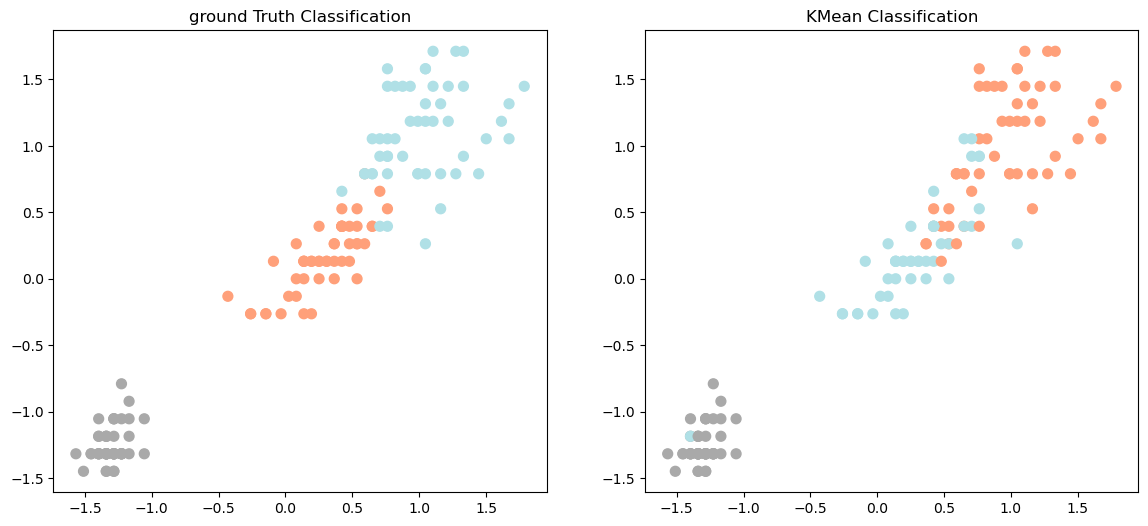

In [184]:

#

plt.figure(figsize=(14,6))

color_theme = np.array(['darkgray','lightsalmon','powderblue'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y['Targets'])

plt.subplot(1,2,1)
plt.scatter(x.Petal_Lenght, x.Petal_Width, c=color_theme[y_encoded], s=50)
plt.title('ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x.Petal_Lenght, x.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('KMean Classification')



Text(0.5, 1.0, 'KMean Classification')

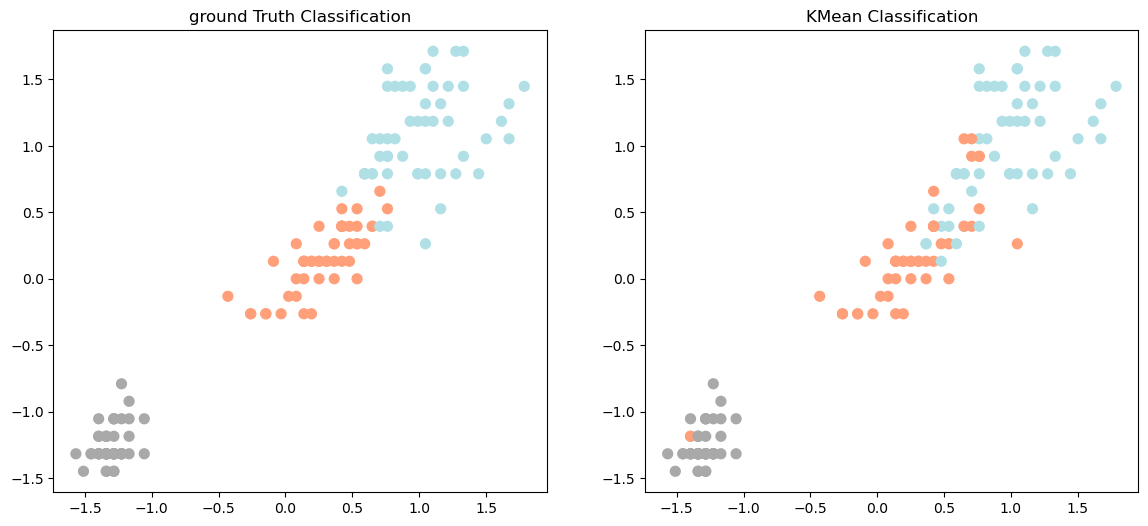

In [190]:

relabel = np.choose(clustering.labels_, [0,2,1]).astype(np.int64)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(x.Petal_Lenght, x.Petal_Width, c=color_theme[y_encoded], s=50)
plt.title('ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x.Petal_Lenght, x.Petal_Width, c=color_theme[relabel], s=50)
plt.title('KMean Classification')


In [217]:

# Avaliando o resultado do clustering

print(classification_report(y_encoded, relabel))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.80      0.74      0.77        50
           2       0.76      0.84      0.80        50

    accuracy                           0.85       150
   macro avg       0.86      0.85      0.85       150
weighted avg       0.86      0.85      0.85       150



In [265]:
# Descobrindo o quê é o quê

df_label = pd.DataFrame(clustering.labels_, columns=['Targets'])
df_comparacao = pd.DataFrame({
    'Classe_Real': y.Targets,  # Strings originais
    'Cluster_KMeans': df_label.Targets # Números gerados pelo KMeans
})
df_comparacao.head()

,Classe_Real,Cluster_KMeans
0,setosa,0
1,setosa,0
2,setosa,0
3,setosa,0
4,setosa,0


In [268]:

pd.crosstab(df_comparacao['Classe_Real'], df_comparacao['Cluster_KMeans'])


Cluster_KMeans,0,1,2
Classe_Real,,,
setosa,49,0,1
versicolor,0,13,37
virginica,0,42,8
